In [13]:
from efficient_kan import KAN
from models.mlp import MLP

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from scipy.interpolate import BSpline
from torch.utils.data import DataLoader
from kan.utils import create_dataset

from dataloaders.dataloader import FCMatrixDataset
from torch.utils.data import Dataset, DataLoader, Subset



In [6]:


model = KAN([55,32,16,2], grid_size=3)
checkpoint = torch.load("models/saved/KAN_api_/deft-sweep-100.pth")
model.load_state_dict(checkpoint)
print(model.layers[2].base_weight[0][0])
model.forward(torch.randn(1,55))


tensor(0.1650, grad_fn=<SelectBackward0>)


tensor([[-0.0128, -0.0940]], grad_fn=<AddBackward0>)

In [8]:
ds = "data/csv/severe_rds.csv"
data_dir = "data/fetched/25751"
mrmr_features = np.array([1140, 536, 223, 907, 1449, 499, 1293, 45, 135, 1440, 879, 1384, 1210, 1316, 122, 22, 492, 638, 765, 1027, 1464, 501, 1462, 395, 26, 1079, 70, 425, 1403, 1409, 1318, 886, 1459, 1448, 939, 1163, 547, 10, 413, 676, 131, 216, 942, 1136, 1386, 232, 1455, 1337, 814, 139, 392, 1376, 1382, 471, 656]
)
# sort mrmr features
mrmr_features = np.sort(mrmr_features)

udi = data_dir.split("/")[-1]
data_dir = data_dir + "/raw"
labels = np.genfromtxt(ds)
labels = labels[1:, 1]
dataset = FCMatrixDataset(ds, data_dir, udi, None, mrmr=mrmr_features)
dataset2 = FCMatrixDataset(ds, data_dir, udi, None, mrmr=None)



In [8]:
print(dataset[0][0][0])
print(dataset2[0][0][1140])
print(dataset2[0][0][0])

tensor(-2.0405)
tensor(9.6208)
tensor(-2.5612)


In [4]:
print(type(model))

print(type(model).__name__)

<class 'efficient_kan.kan.KAN'>
KAN


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


(10, 55)
tensor([-2.0405,  2.9736, -1.9279, -2.0138, 15.2677, -2.7766, -3.7782, -0.1155,
         0.1335, -4.8360, -2.2577,  5.3103,  5.1687,  3.2211, -7.3531,  2.9986,
         2.1771,  2.6712,  1.8710,  1.7654, -8.7138,  6.9587, -7.5969, -6.7912,
        -0.7177,  0.1521,  7.4302,  3.1087,  0.8900, -7.6152,  7.5293, -9.2442,
        -2.2570,  4.5055,  7.7194,  9.6208,  4.6354,  0.9936,  0.1609,  1.7838,
         3.7219, -1.9091, -0.6371, -3.1070, -1.8756,  2.5564, -3.1585,  4.1001,
        -2.0444, -3.5454,  1.8930,  0.5323, -3.2268,  0.9981, -1.7796])


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


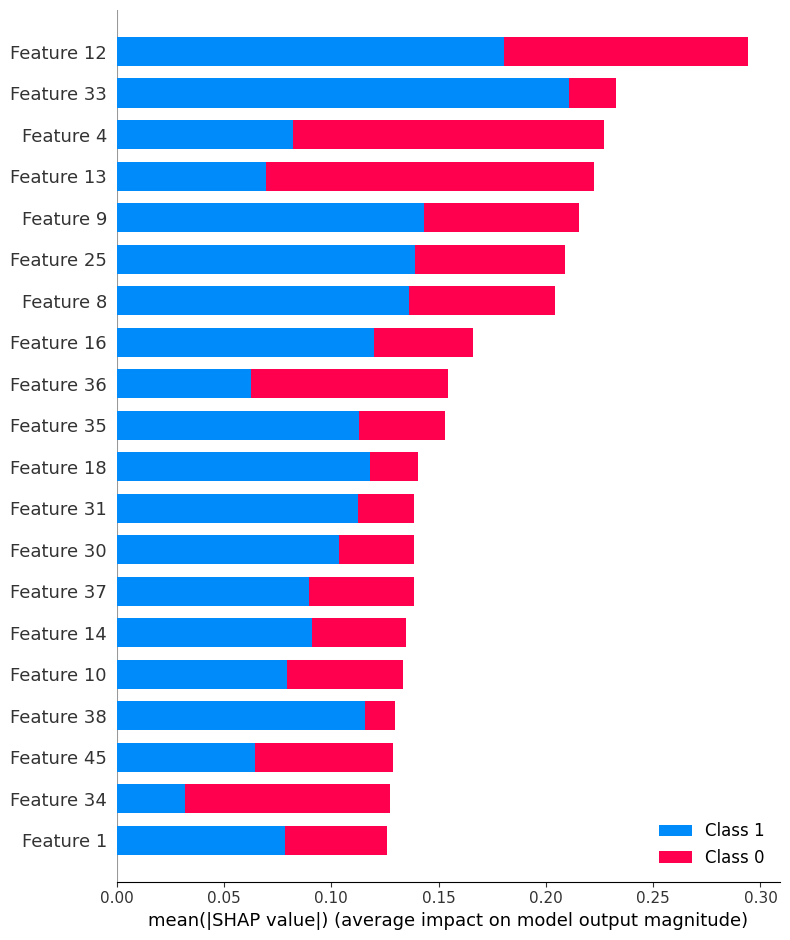

In [9]:
import shap
import sklearn


X = np.array([np.array(i[0]) for i in dataset])
print(X[:10].shape)
X = torch.tensor(np.array([np.array(i[0]) for i in dataset]))
X_loader = DataLoader(X, batch_size=48, shuffle=True)
# X = DataLoader(dataset, batch_size=48, shuffle=True)
print(X[0])

explainer = shap.DeepExplainer(model, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


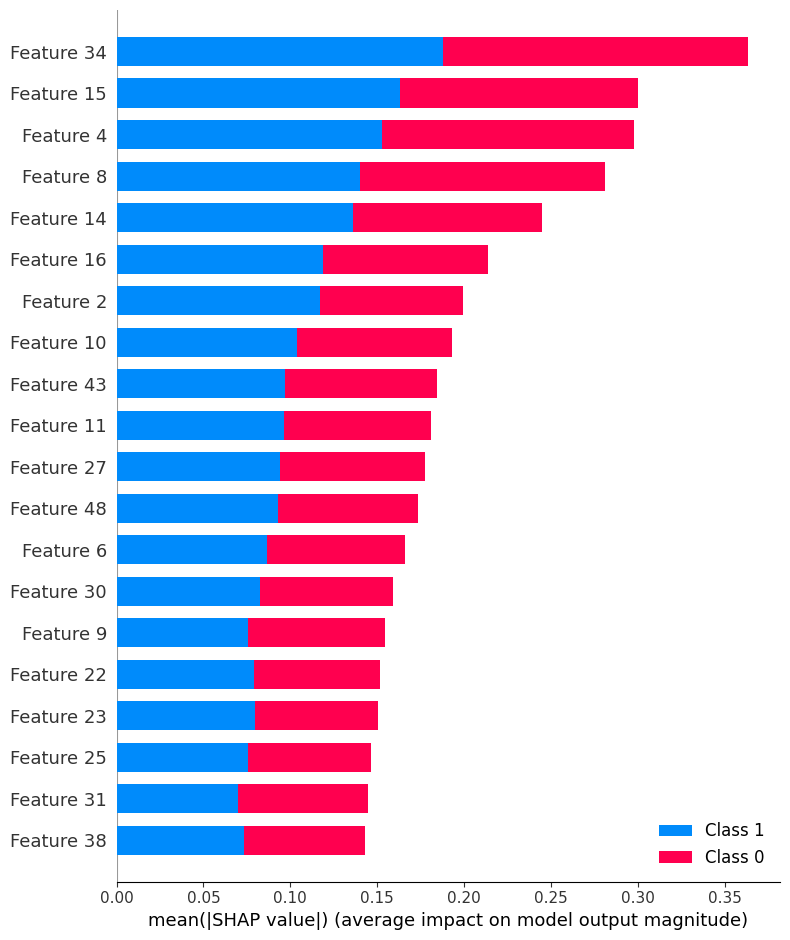

In [30]:

DEVICE = torch.device("cpu")
mlp = MLP(n_inputs = 55, n_hidden = [80,160,320], n_classes = 2)
mlp_checkpoint = torch.load("models/saved/MLP/rosy-sweep-91.pth", map_location=DEVICE)
mlp.load_state_dict(mlp_checkpoint)

explainer = shap.DeepExplainer(mlp, X)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values)

In [61]:
shp = np.array(shap_values)
print(shp.shape)

#get mean over the 1st axis
shp = np.mean(abs(shp), axis=1)
print(shp.shape)

# sum over axis 0
shp = np.sum(shp, axis=0)
print(sorted(shp))

# get indexes of sorted values in descending order
sorted_idx = np.argsort(shp)[::-1]
sorted_idx

features = mrmr_features[sorted_idx]
features


(2, 236, 55)
(2, 55)
[0.011887543621153367, 0.035231513578938285, 0.04613009293676264, 0.05384184007067172, 0.06376675265149107, 0.06850739359355953, 0.07056612957964363, 0.07923023014056094, 0.082433124143536, 0.0824839897767851, 0.0868223570424885, 0.09278353713541607, 0.0939155348415486, 0.09670715778319222, 0.11119228018367844, 0.11444175861516531, 0.12105797146228969, 0.1224035844228083, 0.12530886334032834, 0.13033871201767366, 0.13122618881628778, 0.13229407723813014, 0.1360816043980175, 0.13777701490730349, 0.1398307861206176, 0.1424077247732893, 0.14283210445729172, 0.15067052825058022, 0.15308012334342, 0.15515463493536996, 0.1629709826379825, 0.17705756581735688, 0.17821097553982235, 0.1786947475123008, 0.18654722946161648, 0.18910024489723273, 0.19183561414458875, 0.19234215431769972, 0.19693762601019768, 0.19887408238373916, 0.20642150941125306, 0.22920091433245374, 0.23303349783649752, 0.23447954289274048, 0.23888525723453052, 0.24203499172179332, 0.24373138921423637, 0.2

array([1140, 1079,  765,  139,   70,  413,   10, 1316, 1440,  425,  223,
       1163, 1210,  814,   26,  232,  886,  392,  122,  471, 1382, 1337,
         45, 1409, 1462,  879, 1386,  135,  395, 1027,  547,  492,   22,
        216,  942, 1318,  907, 1384, 1459, 1449,  939,  499, 1403,  501,
       1136, 1455, 1448,  536,  656, 1376,  676, 1293,  131, 1464,  638])

In [59]:
import pandas as pd

# get feature names
edge_nodes = pd.read_csv("FC_edge_node_mapping.csv", sep=" ")
top = edge_nodes.loc[features]

nodes = list(top['Node1'])
nodes.extend(list(top['Node2']))
print(nodes)
print(len(nodes))

# get counts of values in nodes
from collections import Counter

node_counts = Counter(nodes)
print(node_counts)

print(top)

[13, 45, 25, 4, 5, 8, 1, 42, 10, 20, 14, 36, 35, 35, 6, 2, 26, 15, 3, 7, 5, 12, 1, 32, 32, 19, 9, 16, 18, 38, 20, 28, 2, 7, 40, 44, 5, 7, 29, 19, 37, 4, 26, 6, 9, 25, 18, 9, 27, 51, 11, 19, 12, 34, 9, 49, 47, 40, 18, 13, 30, 6, 52, 55, 30, 22, 49, 50, 41, 8, 23, 43, 29, 17, 32, 54, 53, 11, 54, 55, 43, 54, 17, 29, 46, 34, 32, 8, 22, 44, 52, 44, 54, 55, 55, 44, 33, 54, 33, 49, 55, 55, 34, 37, 53, 38, 52, 17, 55, 37]
110
Counter({55: 7, 54: 5, 32: 4, 9: 4, 44: 4, 5: 3, 8: 3, 6: 3, 7: 3, 19: 3, 18: 3, 29: 3, 37: 3, 34: 3, 49: 3, 52: 3, 17: 3, 13: 2, 25: 2, 4: 2, 1: 2, 20: 2, 35: 2, 2: 2, 26: 2, 12: 2, 38: 2, 40: 2, 11: 2, 30: 2, 22: 2, 43: 2, 53: 2, 33: 2, 45: 1, 42: 1, 10: 1, 14: 1, 36: 1, 15: 1, 3: 1, 16: 1, 28: 1, 27: 1, 51: 1, 47: 1, 50: 1, 41: 1, 23: 1, 46: 1})
      EdgeNumber  Node1  Node2  FullCorrelation  PartialCorrelation
1140        1141     13     49             4.83                0.72
1079        1080     45     47             8.16                2.10
765          766     25